In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

PLOT_PREFIX = "Figures/FACES_NN_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_NN_DATA"

In [3]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

KeyboardInterrupt: 

In [ ]:
learning_rate=['adaptive', 'constant']
learning_rate_init=[0.00001, 0.0001, 0.001, .01, 0.1]
max_iter=[100, 200, 300, 500, 1000]
batch_size=[16, 32, 64, 256, 1024, 2056]

parameters = {"learning_rate": learning_rate, 'learning_rate_init': learning_rate_init, 'max_iter': max_iter, 'batch_size': batch_size}

gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

In [5]:
num_nodes_per_layer = [i for i in range(1, 502, 100)]
num_hidden_layers = [i for i in range(1, 12, 2)]

hidden_layer_sizes = []
for num_nodes in num_nodes_per_layer:
    for num_layers in num_hidden_layers:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)

TrainingCurves.full_validaiton_curve(MLPClassifier(), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'balanced_accuracy', cv=TrainingCurves.get_cv(), title="Validation Curve")

18


Plot saved as:  Figures/FACES_NN_PLOT_GS_ModelComplexity_num_hidden_layers_num_nodes_per_layer.png


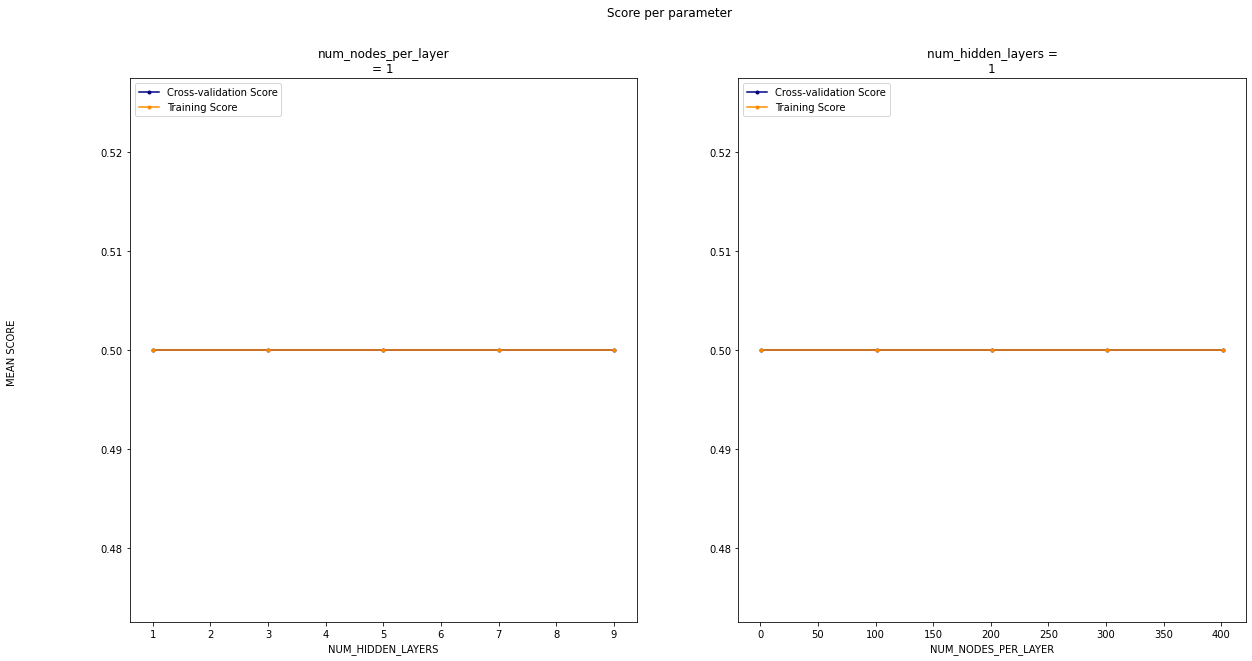

In [3]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GS_Times_C_gamma_kernel.png


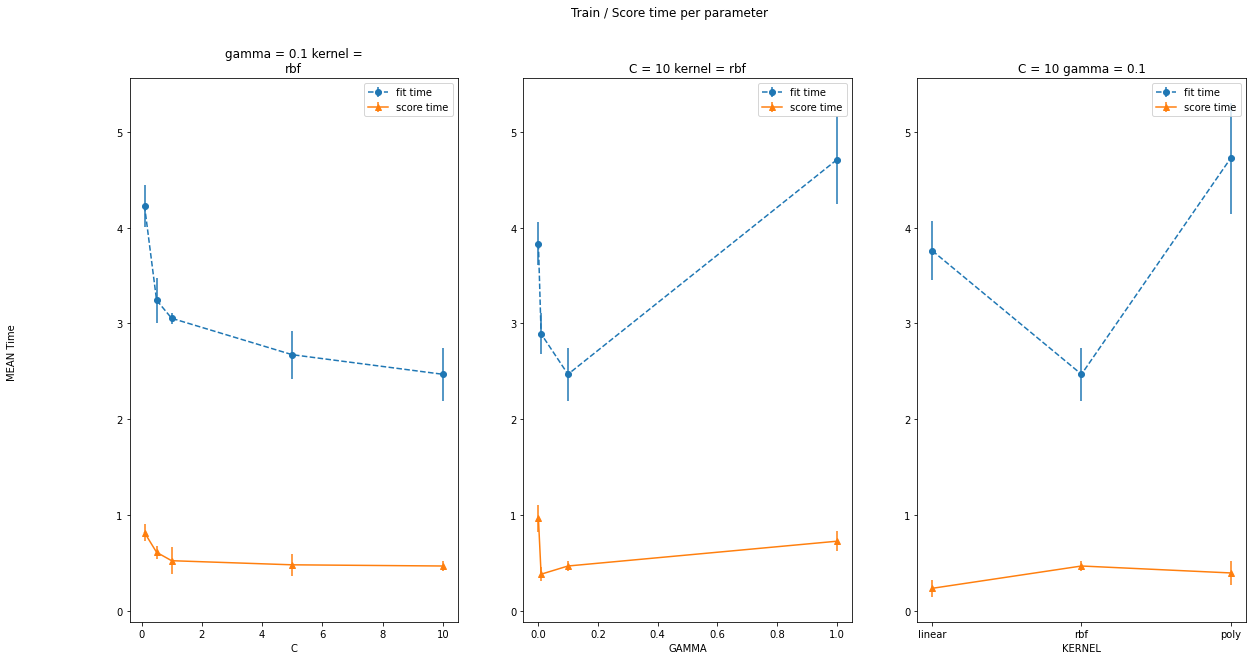

In [15]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_kernel_gamma_0.png


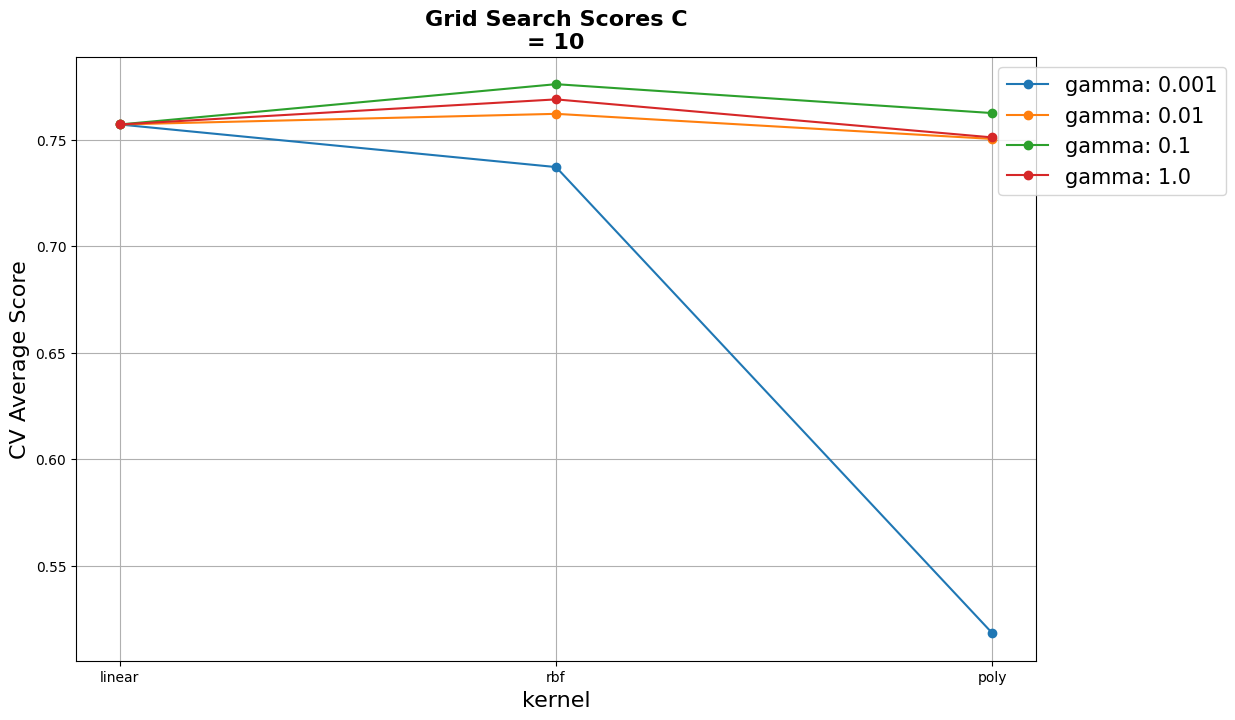

In [16]:
mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'num_nodes_per_layer', 'num_hidden_layers', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_split_10.png


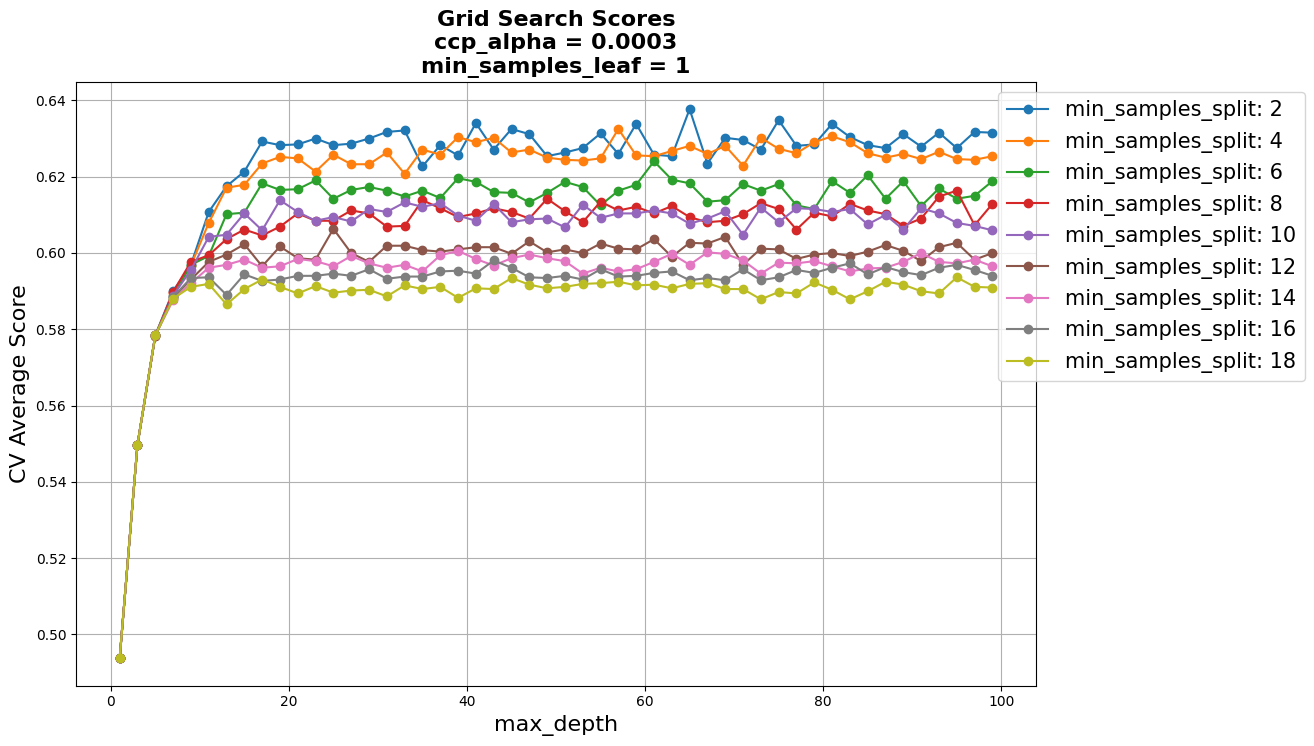